## **TASK_20**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import pandas as pd

In [4]:
#Using Built In Iris dataset
iris= sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# **1. Feature Selection**

In [5]:
# Separate features (X) and target (y)
X = iris.drop(columns=['species'])
y = iris['species']

In [6]:
# Use mutual information to evaluate the importance of features
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

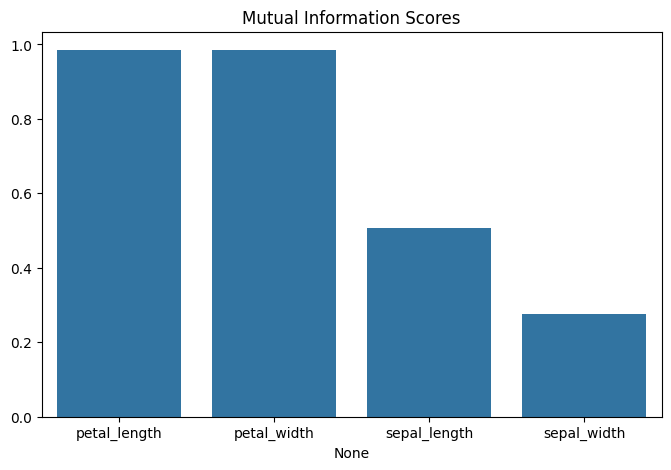

In [7]:
# Plot the mutual information scores
plt.figure(figsize=(8, 5))
sns.barplot(x=mutual_info_series.index, y=mutual_info_series.values)
plt.title('Mutual Information Scores')
plt.show()

In [8]:
# Select the top 2 features based on mutual information
selector = SelectKBest(mutual_info_classif, k=2)
X_selected = selector.fit_transform(X, y)

In [9]:
# Document the selected features
selected_features = X.columns[selector.get_support()]
print("Selected features based on mutual information:", selected_features)

Selected features based on mutual information: Index(['petal_length', 'petal_width'], dtype='object')


**The features 'petal_length' and 'petal_width' were chosen because they have the highest mutual information scores with the target variable 'species'**

# **2. Feature Transformation**

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#Normalize the feature
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

In [17]:
# Log transformation (adding a small constant to avoid log(0))
X_log = np.log(X + 1e-6 )

In [19]:
# Display the transformed features
print("Standardized features:\n", X_scaled[:5])
print("Normalized features:\n", X_normalized[:5])
print("Log transformed features:\n", X_log[:5])

Standardized features:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
Normalized features:
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
Log transformed features:
    sepal_length  sepal_width  petal_length  petal_width
0      1.629241     1.252763      0.336473    -1.609433
1      1.589235     1.098613      0.336473    -1.609433
2      1.547563     1.163151      0.262365    -1.609433
3      1.526057     1.131402      0.405466    -1.609433
4      1.609438     1.280934      0.336473    -1.609433


# **3. Feature Creation**

In [21]:
# Create interaction term: petal_length * petal_width
iris['petal_area'] = iris['petal_length'] * iris['petal_width']

# Display the new feature
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species  petal_area
0           5.1          3.5           1.4          0.2  setosa        0.28
1           4.9          3.0           1.4          0.2  setosa        0.28
2           4.7          3.2           1.3          0.2  setosa        0.26
3           4.6          3.1           1.5          0.2  setosa        0.30
4           5.0          3.6           1.4          0.2  setosa        0.28


# **4. Polynomial Features**

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Display the new polynomial features
print("Polynomial features shape:", X_poly.shape)


Polynomial features shape: (150, 20)


# **5. Handling Categorical Features**

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
y_one_hot = one_hot_encoder.fit_transform(iris[['species']])

# Label encoding
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(iris['species'])

# Display the encoded features
print("One-hot encoded features:\n", y_one_hot[:5])
print("Label encoded features:\n", y_label_encoded[:5])


One-hot encoded features:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Label encoded features:
 [0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
